In [168]:
import pandas as pd
df=pd.read_csv('dataset/housing.csv')

In [170]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [175]:
corr=df.drop(columns=['ocean_proximity'],axis=1).corr()
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='households', ylabel='median_income'>],
       [<Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>,
        <Axes: xlabel='households', ylabel='total_rooms'>],
       [<Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housing_median_age'>,
        <Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='households', ylabel='housing_median_age'>],
       [<Axes: xlabel='median_income', ylabel='households'>,
        <Axes: xlabel='total_rooms', ylabel='households'>,
        <Axes: xlabel='housing_median_age', ylabel='households'>,
        <Axes: xlabel='househol

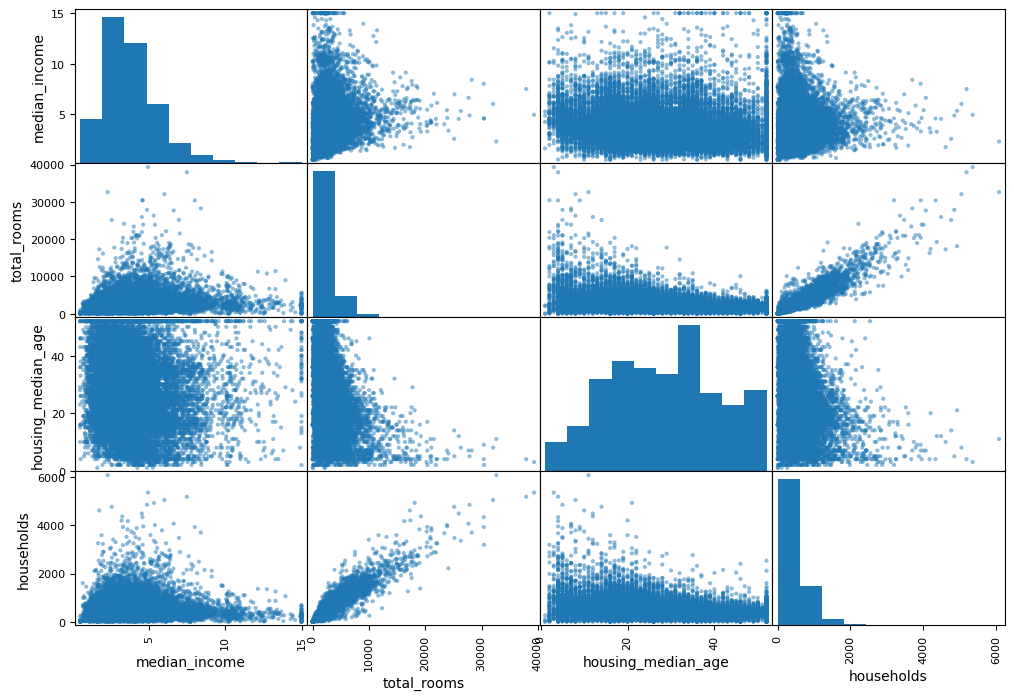

In [176]:
attribute=['median_income','total_rooms','housing_median_age','households']
from pandas.plotting import scatter_matrix
scatter_matrix(df[attribute],figsize=(12,8))

In [184]:
dataset_extract=df[attribute+['median_house_value']]

In [185]:
dataset_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_income       20640 non-null  float64
 1   total_rooms         20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   households          20640 non-null  float64
 4   median_house_value  20640 non-null  float64
dtypes: float64(5)
memory usage: 806.4 KB


In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    dataset_extract[dataset_extract.select_dtypes(include=['float64']).columns],
    dataset_extract['median_house_value'],
    test_size=0.2,
    random_state=2
)

In [218]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
model=Pipeline([
    ('LinearReg',LinearRegression())
])   
model.fit(X_train,y_train)

Pipeline(steps=[('LinearReg', LinearRegression())])

In [219]:
model.predict(X_test)

array([278700., 207600.,  96700., ..., 176000.,  77300., 235400.])

In [220]:
from sklearn.model_selection import cross_val_score
import numpy as np
linear_score = cross_val_score(model, X_test, y_test,
                                scoring="neg_mean_squared_error", cv=10)
linear_rmse_score = np.sqrt(-linear_score)
linear_rmse_score.mean()

8.239204283600123e-11

In [216]:
#K Neigh bors
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
model=Pipeline([
    ('LinearReg',KNeighborsRegressor(n_neighbors=4))
])   
model.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
import numpy as np
linear_score = cross_val_score(model, X_test, y_test,
                                scoring="neg_mean_squared_error", cv=10)
linear_rmse_score = np.sqrt(-linear_score)
linear_rmse_score.mean()

492.2956040723966

In [217]:
#Decision Tree
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
model=Pipeline([
    ('LinearReg',DecisionTreeRegressor())
])   
model.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
import numpy as np
linear_score = cross_val_score(model, X_test, y_test,
                                scoring="neg_mean_squared_error", cv=10)
linear_rmse_score = np.sqrt(-linear_score)
linear_rmse_score.mean()

384.96125590889403

In [222]:
#Random Forest
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
model=Pipeline([
    ('LinearReg',RandomForestRegressor(n_estimators=50))
])   
model.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
import numpy as np
linear_score = cross_val_score(model, X_test, y_test,
                                scoring="neg_mean_squared_error", cv=10)
linear_rmse_score = np.sqrt(-linear_score)
linear_rmse_score.mean()

293.2264400618095

In [225]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [226]:
print(grid_search.best_params_)

{'max_features': 6, 'n_estimators': 30}


In [227]:
print(grid_search.best_estimator_)

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)


In [228]:
#Random Forest
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
model=Pipeline([
    ('LinearReg',RandomForestRegressor(n_estimators=30,max_features=6))
])   
model.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
import numpy as np
linear_score = cross_val_score(model, X_test, y_test,
                                scoring="neg_mean_squared_error", cv=10)
linear_rmse_score = np.sqrt(-linear_score)
linear_rmse_score.mean()

304.242516343354

In [229]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F541F0C070>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F541EE8940>},
                   random_state=42, scoring='neg_mean_squared_error')

In [230]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [234]:
#Random Forest
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
model=Pipeline([
    ('LinearReg',RandomForestRegressor(max_features=7, n_estimators= 180))
])   
model.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
import numpy as np
linear_score = cross_val_score(model, X_test, y_test,
                                scoring="neg_mean_squared_error", cv=10)
linear_rmse_score = np.sqrt(-linear_score)
linear_rmse_score.mean()

289.6894890170262

In [235]:
from sklearn.base import BaseEstimator, TransformerMixin
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        # rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        # population_per_household = X[:, population_ix] / X[:, household_ix]
        # if self.add_bedrooms_per_room:
        #     bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        #     return np.c_[X, rooms_per_household, population_per_household,
        #                  bedrooms_per_room]
        # else:
        #     return np.c_[X, rooms_per_household, population_per_household]
        return self
    